# 선형 회귀 모델로 인덱스 도출

In [1]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense,Input
import pandas as pd
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
# 데이터 모두 합친 파일 가져오기 
filenames = os.listdir('../data/total2/')
filenames

['01_hagye1.csv',
 '02_sanggye2.csv',
 '03_gyonam.csv',
 '04_sanggye10.csv',
 '05_sanggye5.csv',
 '06_sanggye2.csv',
 '07_sanggye67.csv',
 '08_sanggye1.csv',
 '09_sanggye67.csv',
 '10_jongno1234.csv',
 '11_jongno1234.csv',
 '12_jongno1234.csv',
 '13_jongno1234.csv',
 '14_jongno1234.csv',
 '15_jongno1234.csv',
 '16_jongno1234.csv',
 '17_hagye1.csv',
 '18_sanggye2.csv',
 '19_gongneung1.csv',
 '20_gongneung1.csv',
 '21_gongneung2.csv',
 '22_wolgye3.csv',
 '23_junggye23.csv',
 '24_sanggye2.csv',
 '25_sanggye5.csv',
 '26_sanggye67.csv',
 '27_jongno1234.csv',
 '28_sanggye34.csv',
 '29_changsin1.csv',
 '30_buam.csv',
 '31_sajik.csv',
 '32_jongno1234.csv',
 '33_changsin1.csv',
 '34_wolgye1.csv',
 '35_changsin3.csv',
 '36_cheongunhyoja.csv',
 '37_pyeongchang.csv',
 '38_hyehwa.csv',
 '39_gahoe.csv',
 '40_jongno56.csv',
 '41_hyehwa.csv',
 '42_gongneung2.csv',
 '43_ihwa.csv',
 '44_jongno1234.csv',
 '45_gahoe.csv',
 '46_gahoe.csv',
 '47_jongno1234.csv',
 '48_sungin2.csv',
 '49_jongno1234.csv',
 '50

In [3]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail
0,20180507,0.04172,96.467,43.400,101.0,3805.420,1.273
1,20180510,0.04172,67.648,31.915,244.0,4258.262,1.216
2,20180511,0.04172,110.924,71.296,192.0,4276.178,1.306
3,20180512,0.04172,39.515,24.293,56.0,3445.193,1.229
4,20180513,0.06258,20.664,12.441,130.0,3258.588,1.382
5,20180514,0.06258,92.687,65.110,313.0,3981.379,1.282
6,20180515,0.06258,87.309,61.238,273.0,4193.862,1.516
7,20180516,0.06258,41.908,27.438,228.0,4019.172,1.233
8,20180517,0.06258,18.190,7.539,185.0,4000.379,1.253
9,20180518,0.06258,10.677,3.328,107.0,4224.568,1.327


In [4]:
rawdata.to_csv('../data/rawdata.csv', index=False)

In [5]:
# 정규화
rawdata = (rawdata-rawdata.mean())/rawdata.std()

In [6]:
# x_feature와 y_feature 값 설정 
x2 = rawdata[['pm10','pm25','COUNT_T','TMST','search']]
y2 =  rawdata['retail']
x_data2 = np.array(x2)
y_data2 = np.array(y2)
y_data2 = y_data2.reshape(-1, 1)
y_data2 = y_data2
x_data2 = x_data2

In [7]:
# session 클리어
K.clear_session()

# 모델 만들기
model2 = Sequential()
model2.add(Dense(input_dim=5, units=1, activation="linear"))

W0907 16:21:19.649846 22680 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0907 16:21:19.668590 22680 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0907 16:21:19.671583 22680 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 16:21:19.673577 22680 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 16:21:19.676569 22680 deprecation_wrapper.py:119] From C:\Anaconda3\l

In [8]:
# 모델 학습
model2.compile(optimizer='adam', loss='mse')
model2.fit(x_data2,y_data2,batch_size=300, epochs=1000, verbose=1)

W0907 16:21:20.238229 22680 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Epoch 1/1000
14404/14404 [==============================] - 0s 17us/step - loss: 1.0525
Epoch 2/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.8426
Epoch 3/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.6988
Epoch 4/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.6045
Epoch 5/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.5440
Epoch 6/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.5059
Epoch 7/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4804
Epoch 8/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4636
Epoch 9/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4527
Epoch 10/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4443
Epoch 11/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4386
Epoch 12/1000
14404/14404 [=============

14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 187/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 188/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4243
Epoch 189/1000
14404/14404 [==============================] - 0s 5us/step - loss: 0.4243
Epoch 190/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 191/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 192/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 193/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4245
Epoch 194/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 195/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 196/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 197/1000
14404/14404 [========

14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 371/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 372/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 373/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4243
Epoch 374/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4244
Epoch 375/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4244
Epoch 376/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4243
Epoch 377/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 378/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 379/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4243
Epoch 380/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 381/1000
14404/14404 [========

14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 554/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 555/1000
14404/14404 [==============================] - 0s 5us/step - loss: 0.4244
Epoch 556/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 557/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 558/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4245
Epoch 559/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 560/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4245
Epoch 561/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 562/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 563/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4257
Epoch 564/1000
14404/14404 [========

14404/14404 [==============================] - 0s 3us/step - loss: 0.4244
Epoch 737/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4243
Epoch 738/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 739/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4245
Epoch 740/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 741/1000
14404/14404 [==============================] - 0s 3us/step - loss: 0.4245
Epoch 742/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 743/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 744/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 745/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 746/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 747/1000
14404/14404 [========

14404/14404 [==============================] - 0s 5us/step - loss: 0.4245
Epoch 921/1000
14404/14404 [==============================] - 0s 5us/step - loss: 0.4243
Epoch 922/1000
14404/14404 [==============================] - 0s 5us/step - loss: 0.4243
Epoch 923/1000
14404/14404 [==============================] - 0s 5us/step - loss: 0.4244
Epoch 924/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 925/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 926/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 927/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4244
Epoch 928/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4245
Epoch 929/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4243
Epoch 930/1000
14404/14404 [==============================] - 0s 4us/step - loss: 0.4245
Epoch 931/1000
14404/14404 [========

In [9]:
# 인덱스 도출
model2.predict(x_data2)

array([[-0.4000102 ],
       [-0.46416014],
       [-0.34414592],
       ...,
       [-0.85572314],
       [-0.7443993 ],
       [-0.781348  ]], dtype=float32)

In [10]:
rawdata['Linearindex'] = model2.predict(x_data2)

In [11]:
rawdata1 = rawdata[['pm10','pm25','COUNT_T','TMST','search','retail','Linearindex']]
rawdata1

,pm10,pm25,COUNT_T,TMST,search,retail,Linearindex
0,1.067992,0.426393,-0.634053,-0.587751,0.151292,0.157128,-0.400010
1,0.317234,-0.005862,0.324030,-0.539979,0.151292,0.014601,-0.464160
2,1.444609,1.476300,-0.024364,-0.538089,0.151292,0.239643,-0.344146
3,-0.415653,-0.292727,-0.935547,-0.625753,0.151292,0.047107,-0.377173
4,-0.906737,-0.738795,-0.439756,-0.645439,0.627826,0.429678,-0.510922
5,0.969520,1.243480,0.786321,-0.569189,0.627826,0.179632,-0.498422
6,0.829419,1.097752,0.518326,-0.546773,0.627826,0.764741,-0.460260
7,-0.353313,-0.174361,0.216832,-0.565202,0.627826,0.057109,-0.498743
8,-0.971186,-0.923289,-0.071263,-0.567184,0.627826,0.107118,-0.508229
9,-1.166906,-1.081776,-0.593854,-0.543533,0.627826,0.292153,-0.440204


In [12]:
# 직관적 분석을 위해 (-1) 곱하기 : 미세먼지와 인덱스를 양의 상관관계로 만드는 작업
rawdata1['Linearindex'] = rawdata1['Linearindex'] * (-1)
rawdata1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pm10,pm25,COUNT_T,TMST,search,retail,Linearindex
0,1.067992,0.426393,-0.634053,-0.587751,0.151292,0.157128,0.400010
1,0.317234,-0.005862,0.324030,-0.539979,0.151292,0.014601,0.464160
2,1.444609,1.476300,-0.024364,-0.538089,0.151292,0.239643,0.344146
3,-0.415653,-0.292727,-0.935547,-0.625753,0.151292,0.047107,0.377173
4,-0.906737,-0.738795,-0.439756,-0.645439,0.627826,0.429678,0.510922
5,0.969520,1.243480,0.786321,-0.569189,0.627826,0.179632,0.498422
6,0.829419,1.097752,0.518326,-0.546773,0.627826,0.764741,0.460260
7,-0.353313,-0.174361,0.216832,-0.565202,0.627826,0.057109,0.498743
8,-0.971186,-0.923289,-0.071263,-0.567184,0.627826,0.107118,0.508229
9,-1.166906,-1.081776,-0.593854,-0.543533,0.627826,0.292153,0.440204


In [13]:
# 상관계수 구하기
rawdata1.corr()

,pm10,pm25,COUNT_T,TMST,search,retail,Linearindex
pm10,1.000000,0.942492,0.601118,-0.067030,0.389581,-0.119640,0.159029
pm25,0.942492,1.000000,0.561144,-0.049735,0.403678,-0.095586,0.126337
COUNT_T,0.601118,0.561144,1.000000,0.045397,0.526621,-0.111842,0.146076
TMST,-0.067030,-0.049735,0.045397,1.000000,-0.162895,0.738820,-0.973741
search,0.389581,0.403678,0.526621,-0.162895,1.000000,-0.266636,0.352029
retail,-0.119640,-0.095586,-0.111842,0.738820,-0.266636,1.000000,-0.758770
Linearindex,0.159029,0.126337,0.146076,-0.973741,0.352029,-0.758770,1.000000


In [14]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,COUNT_T,TMST,search,retail,Linearindex
pm10,1.000000,0.942492,0.601118,-0.067030,0.389581,-0.119640,0.159029
pm25,0.942492,1.000000,0.561144,-0.049735,0.403678,-0.095586,0.126337
COUNT_T,0.601118,0.561144,1.000000,0.045397,0.526621,-0.111842,0.146076
TMST,-0.067030,-0.049735,0.045397,1.000000,-0.162895,0.738820,-0.973741
search,0.389581,0.403678,0.526621,-0.162895,1.000000,-0.266636,0.352029
retail,-0.119640,-0.095586,-0.111842,0.738820,-0.266636,1.000000,-0.758770
Linearindex,0.159029,0.126337,0.146076,-0.973741,0.352029,-0.758770,1.000000


In [15]:
# 시각화 준비
import seaborn as sns
sns.set()

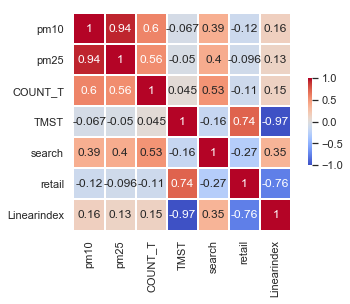

In [16]:
# 히트맵을 통한 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

In [17]:
rawdata1.to_csv('../data/rawdata1.csv', index=False)

# 시각화 작업

### 유통 매출지수와의 상관관계

In [18]:
# 시각화 준비
import seaborn as sns
from matplotlib import pyplot as plt

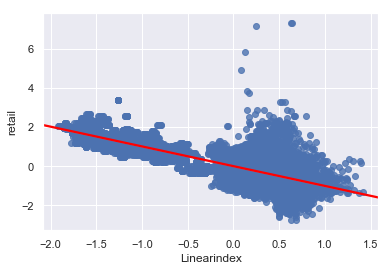

In [19]:
# 인덱스와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['Linearindex'], y=rawdata1['retail'],line_kws={'color': 'red'})

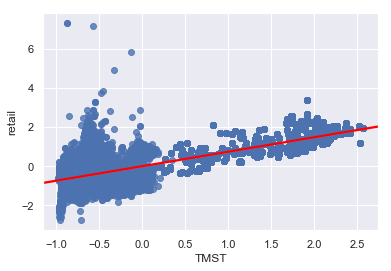

In [20]:
# 유동인구와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['TMST'], y=rawdata1['retail'],line_kws={'color': 'red'})

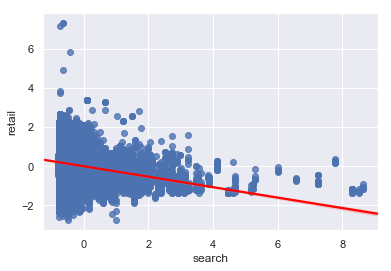

In [21]:
# 검색률과 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['search'], y=rawdata1['retail'],line_kws={'color': 'red'})

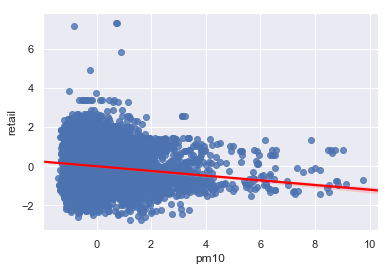

In [22]:
# 미세먼지와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['pm10'], y=rawdata1['retail'],line_kws={'color': 'red'})

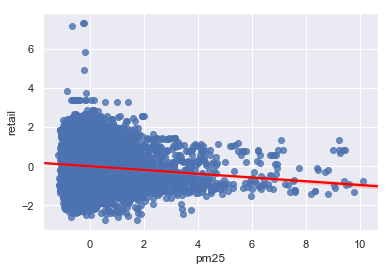

In [23]:
# 초미세먼지와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['pm25'], y=rawdata1['retail'],line_kws={'color': 'red'})

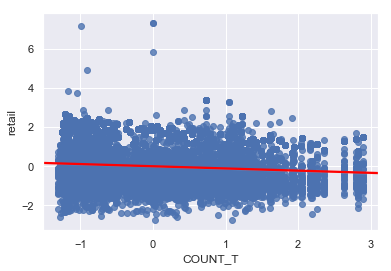

In [24]:
# 뉴스기사 개수와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['COUNT_T'], y=rawdata1['retail'],line_kws={'color': 'red'})

### 인덱스와의 상관관계

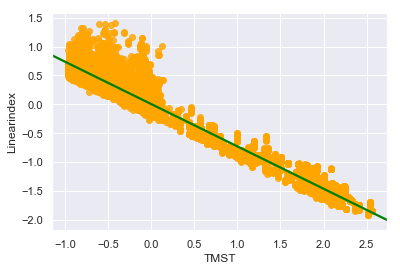

In [25]:
# 유동인구와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['TMST'], y=rawdata1['Linearindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

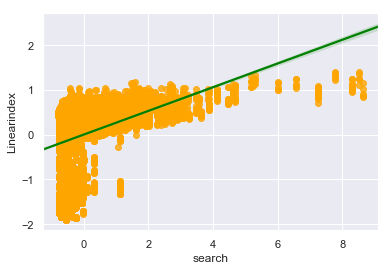

In [26]:
# 검색률과 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['search'], y=rawdata1['Linearindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

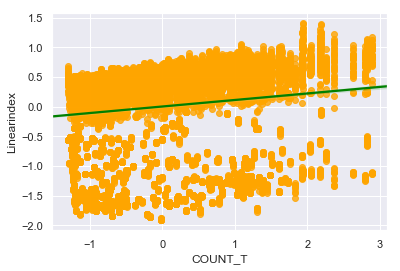

In [27]:
# 뉴스기사 개수와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['COUNT_T'], y=rawdata1['Linearindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

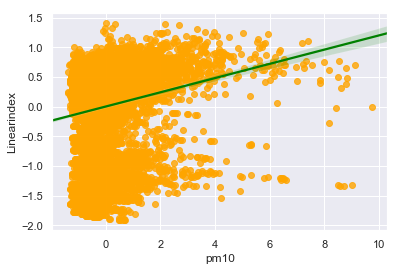

In [28]:
# 미세먼지와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['pm10'], y=rawdata1['Linearindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

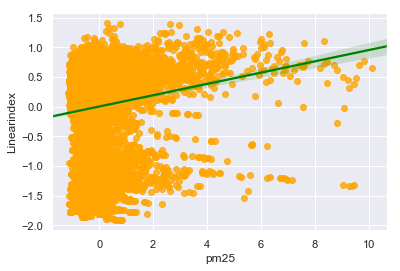

In [29]:
# 초미세먼지와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['pm25'], y=rawdata1['Linearindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

# 동별 인덱스 정리

In [30]:
# 동별로 정규화 후 모델 실행시켜 각각 Linearindex 추가하기

for name in filenames:
    a = pd.read_csv('../data/total2/'+name)
    
    b = (a-a.mean())/a.std()
    x = b[['pm10','pm25','COUNT_T','TMST','search']]
    
    a['Linearindex'] = model2.predict(x)
    
    a.to_csv('../data/totallinear/'+name,index=False)